In [7]:
input_file="datasets/biocreativemutation_train.json"

In [60]:
train_file="biocreativemutation_train.json"
val_file="biocreativemutation_val.json"

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 10000)
pd.set_option('display.max_rows', 100)

In [10]:
data = pd.read_json(input_file)

In [12]:
data.head(n=10)

,id,docid,participant1,participant2,abstract,isValid
0,20638386#817592#817592,20638386,817592,817592,"Crystal structure of tubulin folding cofactor A from Arabidopsis thaliana and its beta-tubulin binding characterization.. Microtubules are composed of polymerized alpha/beta-tubulin heterodimers. . Biogenesis of assembly-competent tubulin dimers is a complex multistep process that requires sequential actions of distinct molecular chaperones and cofactors. . Tubulin folding cofactor A (TFCA), which captures beta-tubulin during the folding pathway, has been identified in many organisms. . Here, we report the crystal structure of Arabidopsis thaliana 817592 (KIESEL, 817592), which forms a monomeric three-helix bundle. . The functional binding analysis demonstrated that 817592 interacts with beta-tubulin in plant. . Furthermore, mutagenesis studies indicated that the alpha-helical regions of 817592 participate in beta-tubulin binding. . Unlike the budding yeast 817592, the two loop regions of 817592 are not required for this interaction suggesting a distinct binding mechanism of 817592 to beta-tubulin in plants.",False
1,21775823#9821#9821,21775823,9821,9821,"7157 inhibits autophagy by interacting with the human ortholog of yeast 851142, 9821/9821.. The tumor suppressor protein 7157 tonically suppresses autophagy when it is present in the cytoplasm. . This effect is phylogenetically conserved from mammals to nematodes, and human 7157 can inhibit autophagy in yeast, as we show here. . Bioinformatic investigations of the 7157 interactome in relationship to the autophagy-relevant protein network underscored the possible relevance of a direct molecular interaction between 7157 and the mammalian ortholog of the essential yeast autophagy protein 851142, namely RB1-inducible coiled-coil protein 1 (9821), also called FAK family kinase-interacting protein of 200 KDa (9821). . Mutational analyses revealed that a single point mutation in 7157 (K382R) abolished its capacity to inhibit autophagy upon transfection into 7157-deficient human colon cancer or yeast cells. . In conditions in which wild-type 7157 co-immunoprecipitated with 9821/9821, 7157 (K382R) failed to do so, underscoring the importance of the physical interaction between these proteins for the control of autophagy. . In conclusion, 7157 regulates autophagy through a direct molecular interaction with 9821/9821, a protein that is essential for the very apical step of autophagy initiation.",False
10,18725399#51096#51096,18725399,51096,51096,"A direct interaction between the 55813 half-a-tetratricopeptide repeat domain and a specific peptide in 134430 is essential for efficient pre-rRNA processing.. The small subunit (SSU) processome is a ribosome biogenesis intermediate that assembles from its subcomplexes onto the pre-18S rRNA with yet unknown order and structure. . Here, we investigate the architecture of the UtpB subcomplex of the SSU processome, focusing on the interaction between the half-a-tetratricopeptide repeat (HAT) domain of 55813 and a specific peptide in 134430. . We present a comprehensive map of the interactions within the UtpB subcomplex and further show that the N-terminal domain of 55813 interacts with 51096 while the HAT domain interacts with 134430. . Using a panel of point and deletion mutants of 55813, we show that an intact HAT domain is essential for efficient pre-rRNA processing and cell growth. . Further investigation of the 55813-134430 interaction using both genetic and biophysical methods shows that the HAT domain binds a specific peptide ligand in 134430, the first example of a HAT domain peptide ligand, with a dissociation constant of 10 muM.",False
100,19372599#7439#7439,19372599,7439,7439,"Human disease-causing mutations disrupt an N-C-terminal interaction and channel function of 7439.. Mutations in the human 7439 (7439) chloride channel cause Best vitelliform macular dystrophy. . Although mutations in its transmembrane domains were found to alter b

## Data Exploration

In [27]:
data.shape

(4019, 6)

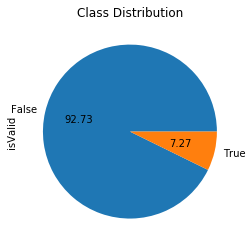

In [19]:
data["isValid"].value_counts().plot.pie(autopct='%.2f')
plt.title('Class Distribution')
plt.show()


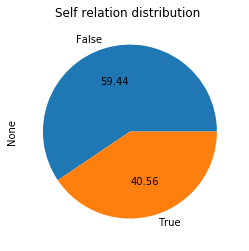

In [52]:
((data['participant1'] == data['participant2'])).value_counts().plot.pie(autopct='%.2f')
plt.title('Self relation distribution ')
plt.show()

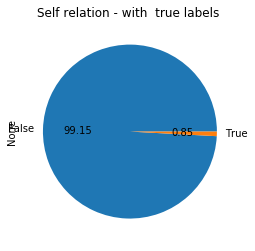

In [44]:
((data['participant1'] == data['participant2']) &  data['isValid']).value_counts().plot.pie(autopct='%.2f')
plt.title('Self relation - with  true labels ')
plt.show()

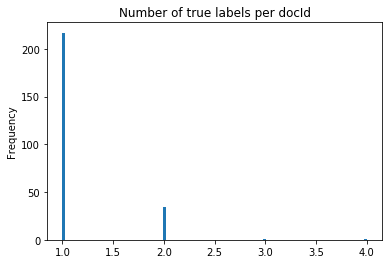

In [45]:
data.query('isValid == True')["docid"].value_counts().plot.hist(bins=100)
plt.title('Number of true labels per docId')
plt.show()

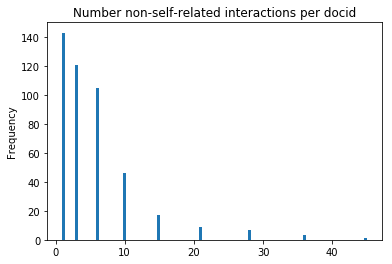

In [51]:
data.query('participant1 != participant2')["docid"].value_counts().plot.hist(bins=100)
plt.title('Number non-self-related interactions per docid')
plt.show()

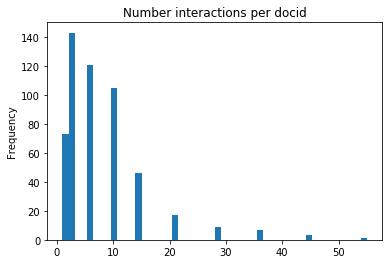

In [55]:
data["docid"].value_counts().plot.hist(bins=50)
plt.title('Number interactions per docid')
plt.show()

## Prepare for training

In [58]:
from sklearn.model_selection import train_test_split
trainpubmed, valpubmed = train_test_split(data.docid.unique(), test_size=.2,
                                                        random_state=777)



train = data[data['docid'].isin(trainpubmed)]
val = data[data['docid'].isin(valpubmed)]


In [61]:
train.to_json(train_file)
val.to_json(val_file)

## Train

In [62]:
from algorithms.main_train_biocreative import run